<b>Stack Overflow Survey</b>

<b>CRISP-DM Steps</b><br>

<b>1. Business Understanding</b><br>
        1) How many years of coding should I have in order to land a full-time job?<br>
        2) How does MajorUndergrad contribute to landing a full-time job?<br>
        3) What methods do employed developers recommend to switch to a career as a developer?<br>
        4) Which other aspects correlate well to a developer?

<b>2. Data Understanding</b><br>
    The 2018 StackOverflow data was used to attempt to answer my questions of interest. 

In [121]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

df = pd.read_csv('survey_results_public_2018.csv')  #read in data

<b>3. Prepare Data</b><br>
    The 2018 StackOverflow data was cleaned and formatted using the steps below. 

<b>a) Read the database schema to find the meaning to each column and preview the database</b>

In [122]:
#pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
schema = pd.read_csv('survey_results_schema.csv')
schema.head(n=200)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


In [123]:
#preview the data
pd.set_option('display.max_columns', 200)
df.head(n=200)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [124]:
#show number of columns in dataframe
len(df.columns)

154

<b>b) Determine the type of data to look at. In this step, I looked at the different responses under the EmploymentStatus column</b>

In [125]:
#determine the unique values in the EmploymentStatus Column
df['EmploymentStatus'].unique()

array(['Not employed, and not looking for work', 'Employed part-time',
       'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'I prefer not to say',
       'Retired'], dtype=object)

<b>c) Prepare the data</b>
The data was prepared by first removing all rows where the response under the Employment Status column was not 'Employed full-time'. No additional data formatting was necessary for Questions 1 and 2. Missing values were not addressed in this first step as the analysis did not require

Next a new dataframe containing the CousinEducation column was extracted to answer Question 3. The data in the CousinEduction column consists of multiple entries and so it was necesary to separate each response into new columns. Duplicate columns were dropped. NaN's were converted to 0 so they would not be included in the analysis. The columns were then added and sorted.

In [126]:
def clean_data(df):
    '''This function takes the dataframe as input and returns dataframes for questions 1 to 3
    which are cleaned and formatted appropriately
    
    Cleaning Steps:
    1) Drop Rows where survey respondents did not respond as Employed full-time
    2) Extract CousinEducation column
    3) split strings to a list
    4) Split list and make each value a new column and merge to new dataframe
    5) Strip strings of leading white spaces
    6) Reset index
    7) Drop duplicate columns and rename remaining columns
    8) Count number of unique values
    9) Convert NaN to 0
    10) Add up values in each column and store in new column
    11) Reset Index
    12) Rename Column
    13) Store desired columns in new dataframe 
    14) Sort in descending order
    15) Return dataframes
    '''
    #Drop rows which people did not respond work full-time
    df.drop(df[df.EmploymentStatus != 'Employed full-time'].index, inplace=True)
    
    #Extract CousinEducation column - The following lines are for question 3
    df_cous_col = df['CousinEducation']

    #split values in each row to a list
    df_split = df_cous_col.str.split(';')
    
    #Split list into separate columns and merge into new dataframe and drop NaN values
    df_cous_split = df_split.apply(pd.Series) \
    .merge(df_split.apply(pd.Series), left_index = True, right_index = True).dropna()
    
    #Strip values of leading white spaces
    df_cous_split = df_cous_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    
    #Reset index
    df_cous_split.reset_index(drop=True, inplace=True)
    
    #Drop the duplicate columns and rename the remaining columns
    df_job_switch = df_cous_split.drop(['0_y', '1_y','2_y','3_y'], axis=1).rename(index=str, columns = {'0_x': 'Response1', \
                                         '1_x': 'Response2', \
                                          '2_x': 'Response3', \
                                          '3_x': 'Response4'})
    #Count number of unique vales
    df_job_switch_counts = df_job_switch.apply(pd.Series.value_counts)
    
    #convert NaN to 0
    df_job_switch_counts.fillna(0, inplace=True);
    
    #Add up values for each row and store in a Total column
    df_job_switch_counts['Tot'] = df_job_switch_counts['Response1'] + df_job_switch_counts['Response2'] \
        + df_job_switch_counts['Response3'] + df_job_switch_counts['Response4']
    
    #reset index
    df_job_switch_counts.reset_index(inplace=True)
    
    #rename column
    df_job_switch_counts.rename(columns={'index': 'Method'}, inplace=True)
    
    #Store the Methods and Total column to new dataframe
    df_job_switch_counts_ext = df_job_switch_counts[['Method', 'Tot']]
    
    #Sort in descending order
    df_job_switch_counts_ext.sort_values(by='Tot', ascending=False, inplace=True);
    
    return df, df_job_switch_counts_ext

In [127]:
#Call function to clean data
df, df_job_switch_counts_ext = clean_data(df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<b>d) Create Plot Function</b>
A function for plotting was created to use in addressing the question.

Create Plot Function

In [128]:
def plot_function(df, plot_type, figure_size, title_text, xlim_val, x_val, rot_num):
    '''This function takes the dataframe, plot type, desired figure size, plot title, and 
    plot rotation as input and returns appropraite plot command.
    
    Plotting Steps:
    1) Use dataframe.plot command
    2) Choose plot type
    3) Input figure size in format of (number,number)
    4) Fill in Title Text as string
    5) Input rotation number
    6) Return plot
    
    format:
    df.plot.type(figsize=(int,int), title='Title Text', rot=number);
    
    '''
    plot = df.plot(kind=plot_type, figsize=figure_size, title=title_text, xlim=xlim_val, legend=False, x=x_val, rot=rot_num);
    
    return plot

Create function to count values and return percent

<b>e) Look for missing Data</b>
Create a function that look for missing data in the df dataframe. First, the percent of missing data per column is first analyzed. If the column contains more than the specified number of missing data, then the column is removed. Next, the percent of missing data per row is analyzed. If the row contains more than the specified number of missing data, then the row is removed.


First create a function to find the number and percent of missing data per column. 

In [129]:
def calc_missing(df):
    '''
    This function takes a dataframe as input and outputs the number of NaNs removed for plotting
    
    1) Find the number of missing data for each column and sort
    2) Find proportion of missing data for each column and sort
    3) Return sorted number of missing data and sorted percent of missing data
    '''
    #find number of missing data for each column
    df_missing_col = df.isna().sum().sort_values()
    
    #Calculate get number of rows in df
    df_num_data = len(df.index)
    
    #Find proportion of missing data for each colummn and sort
    percent_miss_col = 100*(df_missing_col / df_num_data)
    percent_miss_col_sorted = percent_miss_col.sort_values()
    
    #find number of missing data for each row
    df_missing_row = df.isna().sum(axis=1).sort_values()
    
    #Find proportion of missing data for each row
    #percent_miss_row_2018 = 100*(df_missing_row_2018 / len(df_ext_2018.index))
    #percent_miss_row_sorted_2018 = percent_miss_row_2018.sort_values()

    return percent_miss_col_sorted, df_missing_col, df_missing_row

Next, plot number of missing data to determine which if any data should be dropped

In [130]:
#Call calc missing function to find number and percent of missing data per column
percent_miss_col_sorted, df_missing_col, df_missing_row = calc_missing(df)

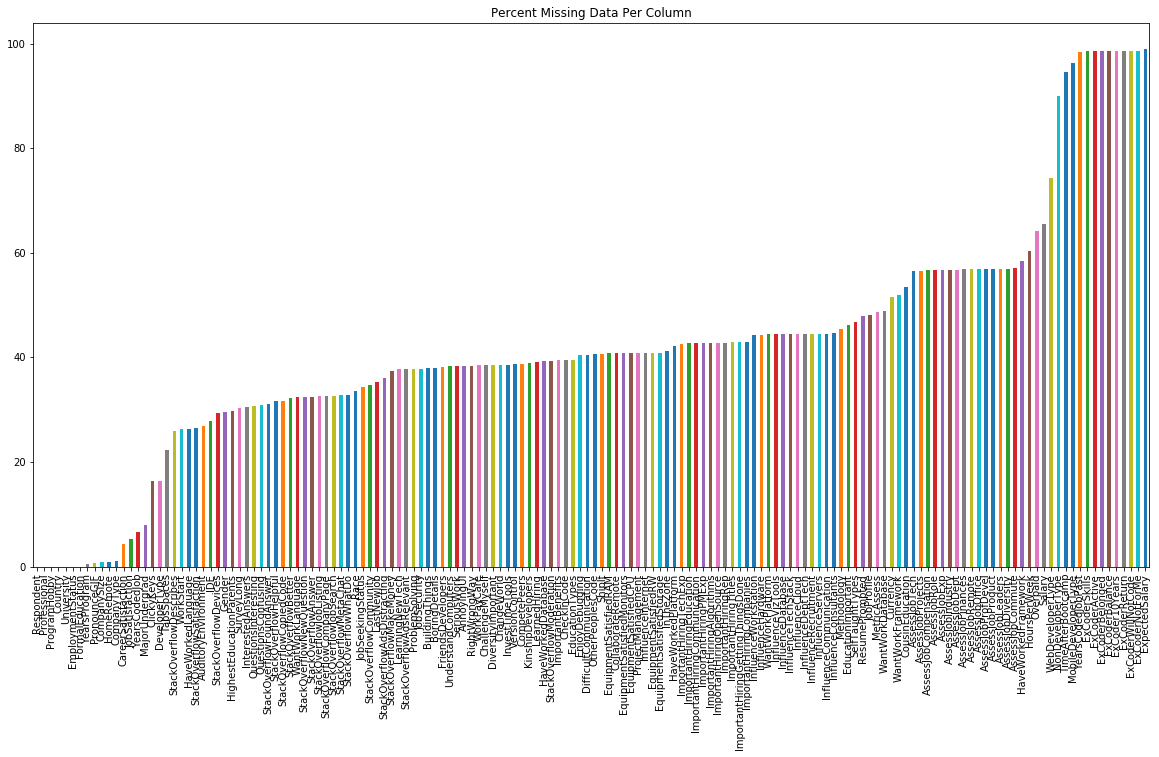

In [131]:
#plot percent of missing data columns using plot 
plot_function(percent_miss_col_sorted, 'bar', (20,10) , 'Percent Missing Data Per Column', None, None, 90);

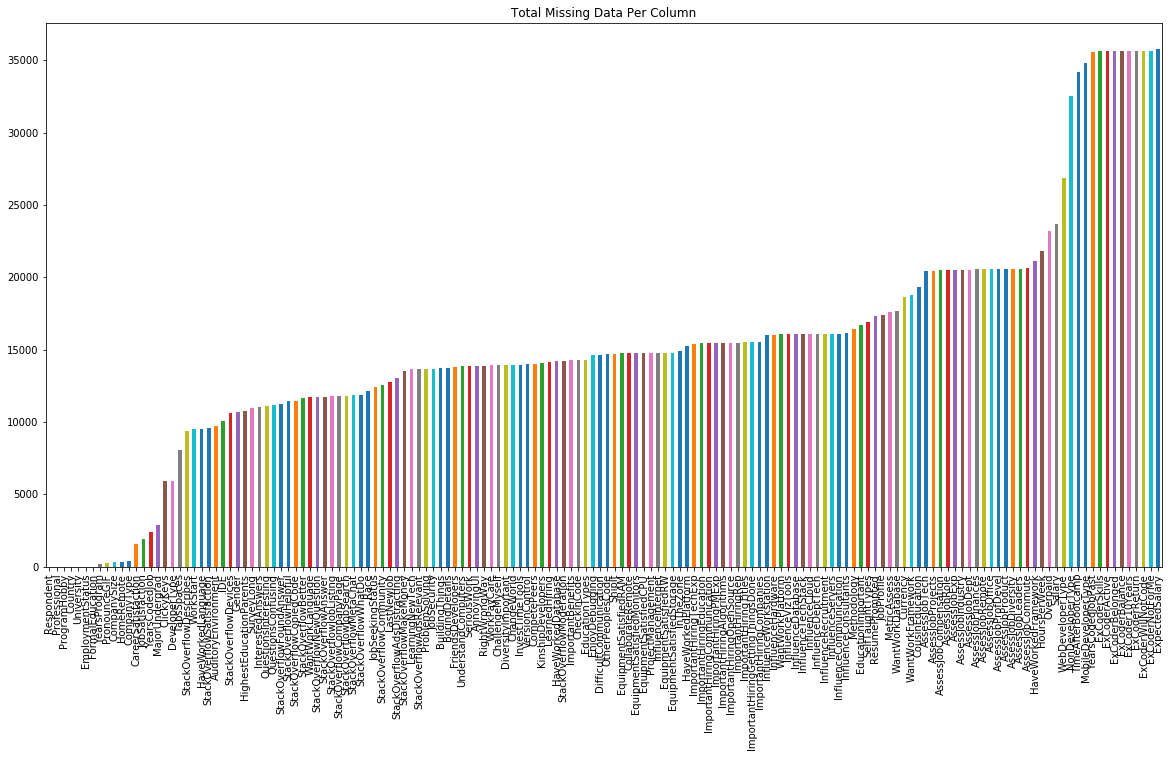

In [132]:
#plot number of missing data columns using plot
plot_function(df_missing_col, 'bar', (20,10) , 'Total Missing Data Per Column', None, None, 90);

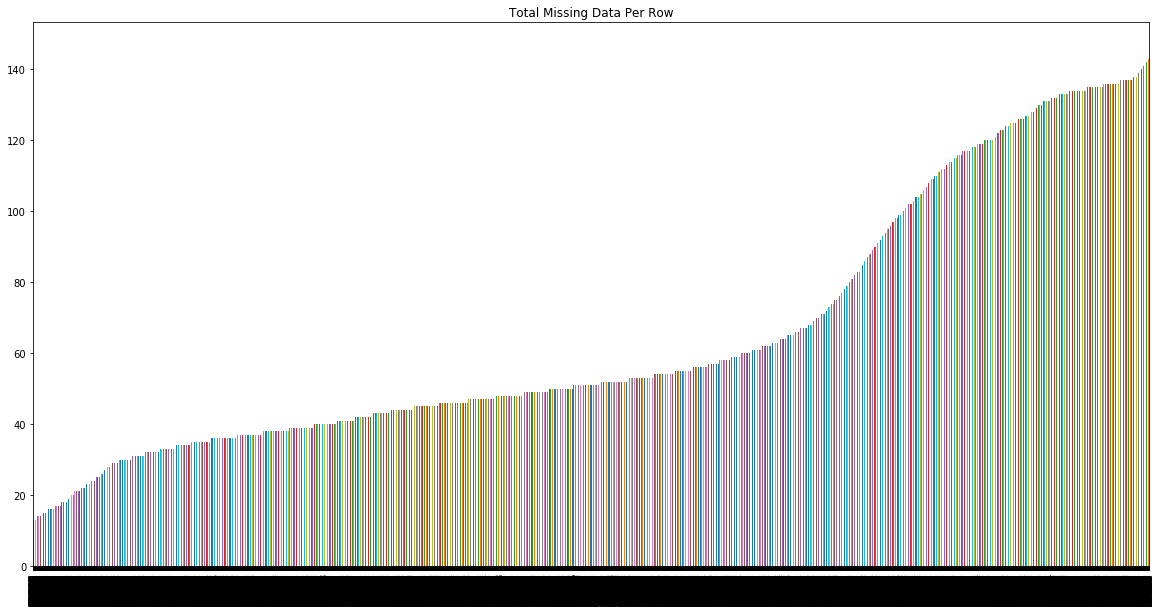

In [133]:
#plot number of missing data rows using plot
plot_function(df_missing_row, 'bar', (20,10) , 'Total Missing Data Per Row', None, None, 90);

Finally, create a function to drop the specified number of missing data per column and row 

In [136]:
def clean_missing(df, max_number_nans, thresh_val):
    '''
    This function takes a dataframe as input and outputs the dataframe with appropriate NaNs removed
    
    1) Remove columns which contain more missing data than specified in the max_number_of_nans
    2) Drop rows which contain more missing data than specified in the thresh_val
    3) Return dataframe with columns and rows removed
    '''
    
    #drop columns which contain more missing values than given by the max_number_nans value
    #df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_nans)]
    
    #drop columns which contain more missing values than given by the max_number_nans value
    df.dropna(axis=1, thresh=max_number_nans, inplace=True)
    
    #drop rows which contain more missing values than given by the thresh_val value
    df.dropna(axis=0, thresh=thresh_val, inplace=True)
    
    return df

In [135]:
#Based on the number of NaN's, keep on the columns which contain less than the number specified in max_number_of_nans
df = clean_missing(df, 15000, 50)

<b>4. Model Data</b><br>
The data was modeled using the steps below

<b> a) Find number of unique vales per column and convert to percent</b>
Create a function to find the number of unique values and convert to percent

In [9]:
def count_values_to_percent(df, column_name):
    '''This function takes the dataframe and name and returns new dataframe which has had the number of unique
    added per value and normalized. The function then converts the dataframe values to percent.
    
    Steps:
    1) Apply value_counts method to specified dataframe and normalize
    2) Multiply dataframe by 100 to make each value a percentage
    3) Return new dataframe
    '''
    #Count number of different responses and normalize
    df = df[column_name].value_counts(normalize=True)
    
    #convert dataframe to percent
    df_new = df * 100
    
    return df_new

<b> b) Use function</b>
Use function to find percents

In [ ]:
#Call function to get percent dataframe for Question 1
df_yrs_prog_percent = count_values_to_percent(df, 'YearsProgram')

#Call function to get percent dataframe for Question 2
df_undergrad_major_percent = count_values_to_percent(df, 'MajorUndergrad')

<b>5. Results</b><br>
The results are discussed below for each question

<b>Question 1:</b> How many years of coding do people who have a full-time coding job typically have?

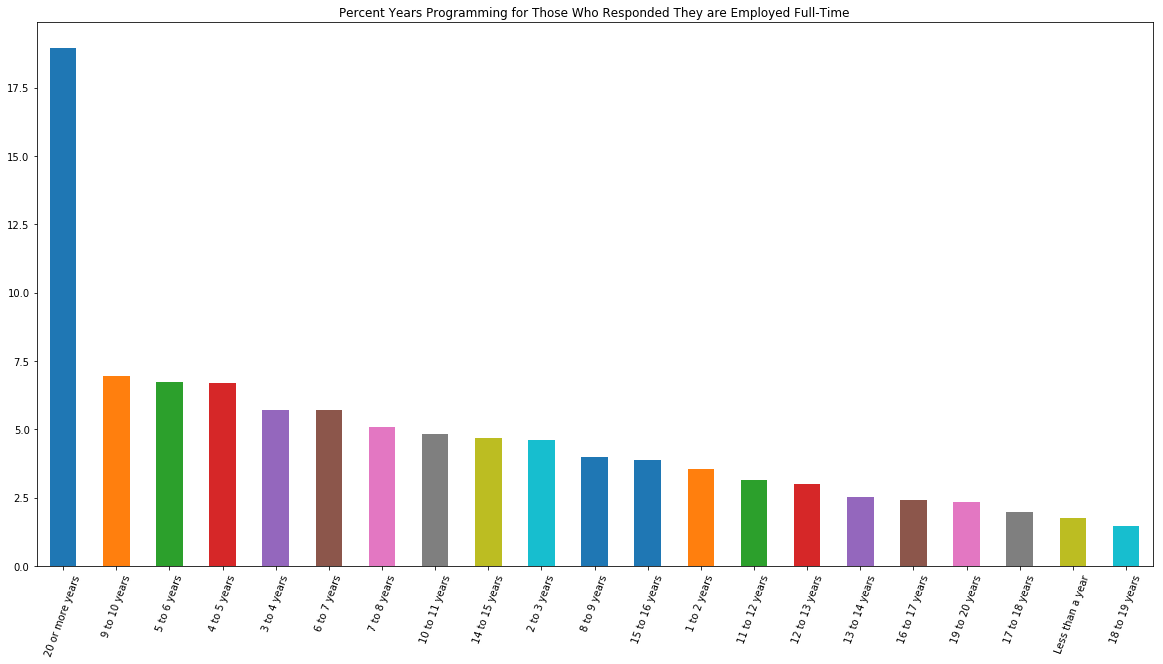

In [11]:
#Plot Years Programming using plot function
plot_function(df_yrs_prog_percent, 'bar', (20,10) , 'Percent Years Programming for Those Who Responded They are Employed Full-Time', None, None, 70);

<b>Question 2:</b> Which undergraduate degree do people who have a full-time coding job typically have?

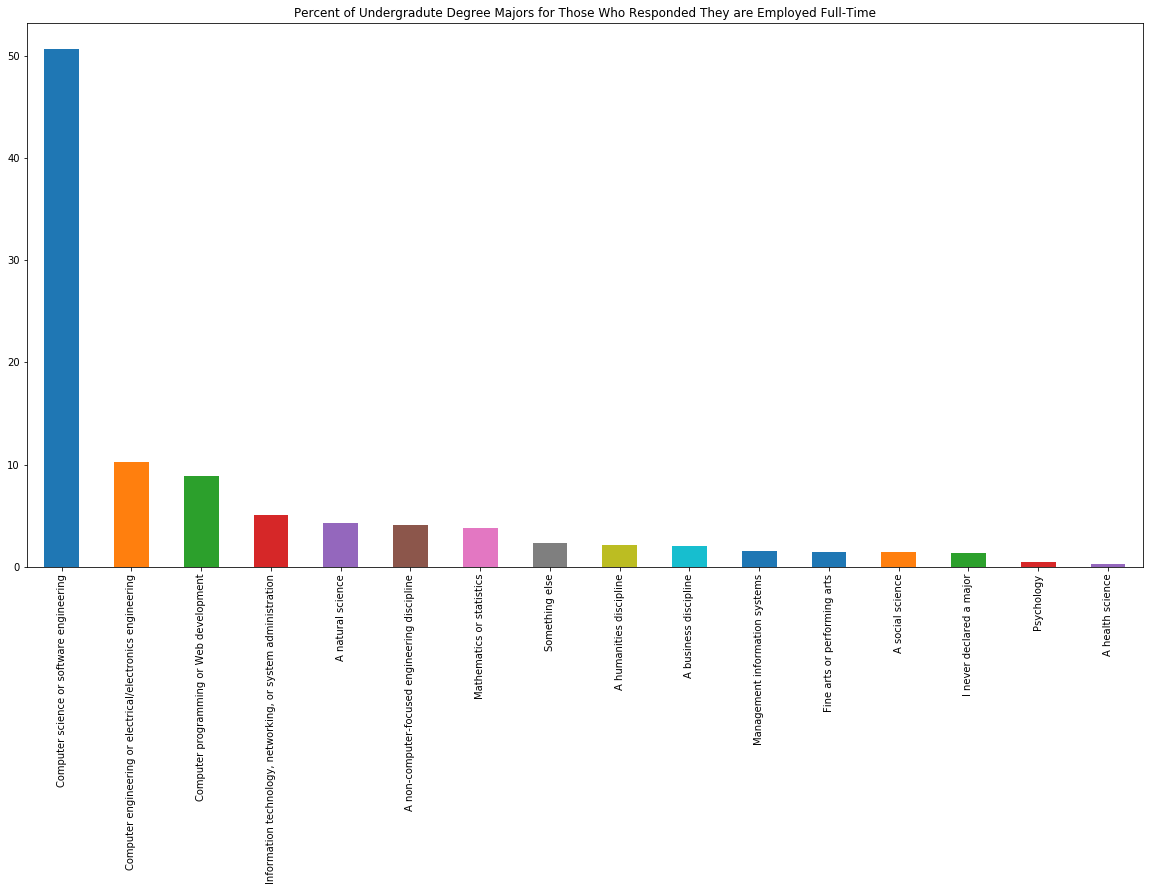

In [13]:
#Plot Undergrad responses using plot function
plot_function(df_undergrad_major_percent, 'bar', (20,10) , 'Percent of Undergradute Degree Majors for Those Who Responded They are Employed Full-Time', None, None, 90);

<b>Question 3:</b> What methods do employed developers recommend to switch to a career as a developer?

In [14]:
#show schema result for the CousinEducation column since the column name is a little confusing to me
schema_cous = schema['Column'] == 'CousinEducation'
schema[schema_cous]

,Column,Question
86,CousinEducation,"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Alice?"


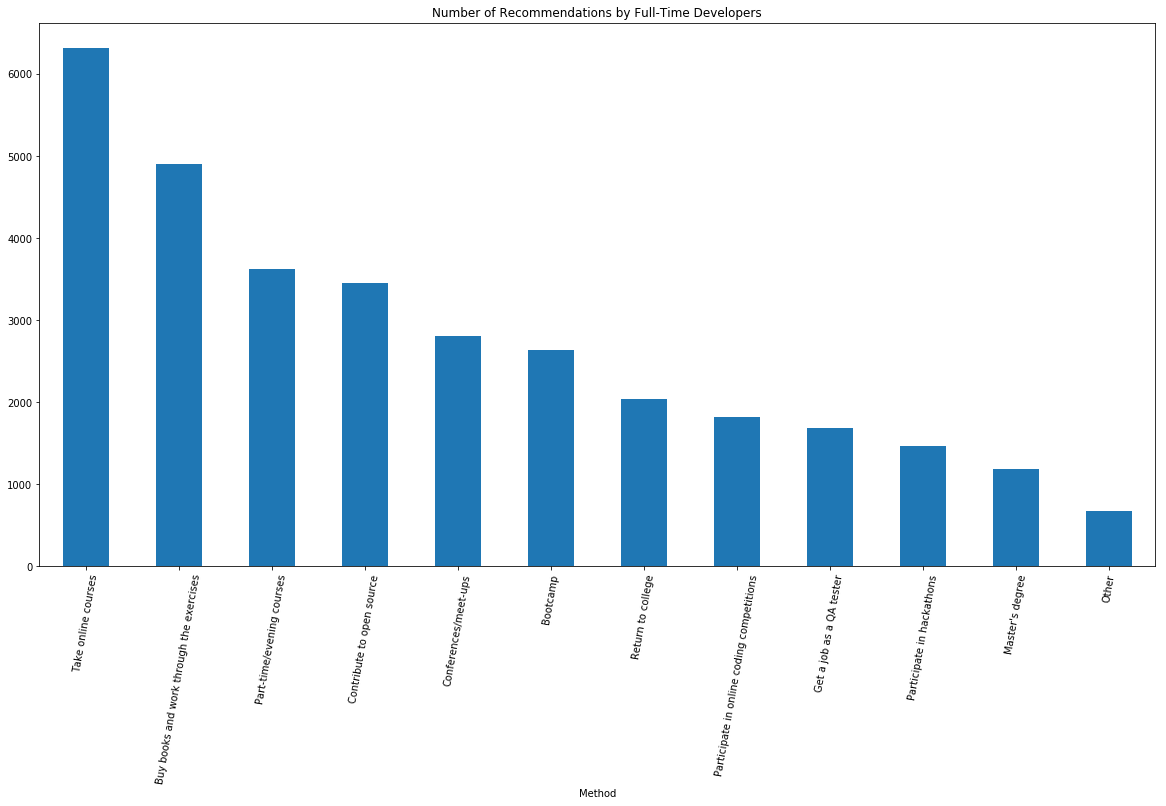

In [15]:
#Plot developer recommendations using plot function
plot_function(df_job_switch_counts_ext, 'bar', (20,10), 'Number of Recommendations by Full-Time Developers', None, 'Method', 80);

<b>Question 4:</b> What other aspects correlate well to those who have a full-time coding job typically have?

In [16]:
#Generate correlation matrix
corr_df = df.corr()
corr_df

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
Respondent,1.000000,-0.018845,-0.020308,0.010621,0.039434,-0.027286,-0.032595
CareerSatisfaction,-0.018845,1.000000,0.650319,-0.049264,0.150884,0.161014,NaN
JobSatisfaction,-0.020308,0.650319,1.000000,-0.092189,0.087516,0.121130,NaN
HoursPerWeek,0.010621,-0.049264,-0.092189,1.000000,0.000583,-0.122765,-0.009982
StackOverflowSatisfaction,0.039434,0.150884,0.087516,0.000583,1.000000,-0.076268,0.069155
Salary,-0.027286,0.161014,0.121130,-0.122765,-0.076268,1.000000,NaN
ExpectedSalary,-0.032595,NaN,NaN,-0.009982,0.069155,NaN,1.000000


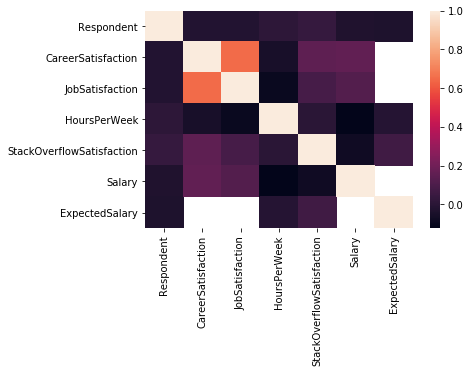

In [17]:
#plot heat map
sns.heatmap(corr_df);

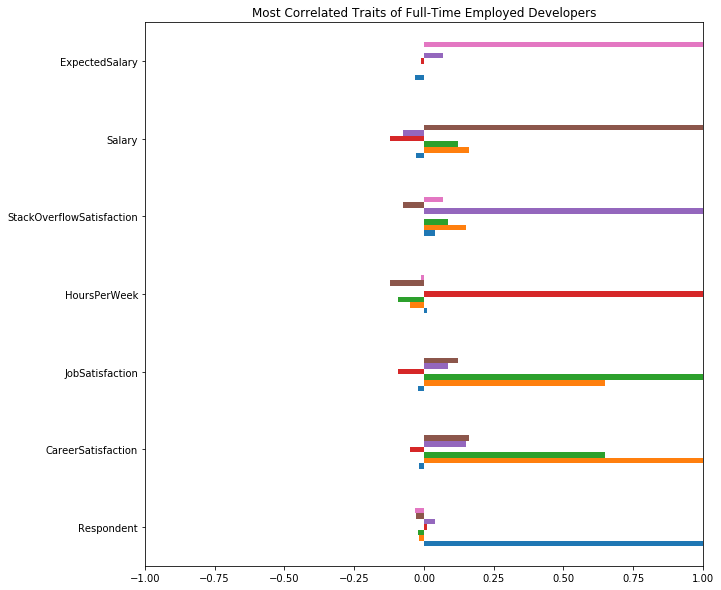

In [18]:
#generate horizontal bar plot to show correlations
plot_function(corr_df, 'barh', (10,10) , 'Most Correlated Traits of Full-Time Employed Developers', [-1,1], None, 0);